# Airline Passenger Satisfaction Prediction
## Predicting Customer Satisfaction for Airline Services

In [50]:
# First import all requred labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Loading the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [54]:
# Merging the two datasets
pass_airline = pd.concat([df_train, df_test])
# Dropping irrelevant column(s)
pass_airline.drop('Unnamed: 0', axis = 1, inplace = True)

In [56]:
pass_airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [58]:
# Checking the structure and types of the dataset
pass_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 non

In [60]:
pass_airline.shape

(129880, 24)

In [62]:
# Checking for missing values
pass_airline.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [64]:
# Calculate the mean of the column (excluding NaNs)
mean_value = pass_airline['Arrival Delay in Minutes'].mean()

# Fill missing values with the mean
pass_airline['Arrival Delay in Minutes'].fillna(mean_value, inplace=True)

In [66]:
# Re-checking the missing values
pass_airline.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [68]:
# Checking for duplicates
pass_airline.duplicated().sum()

0

In [70]:
# Checking summary statistics of the dataset
pass_airline.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.407410
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [72]:
pass_airline.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [74]:
# Converting categorical columns to numeric
pass_airline = pd.get_dummies(pass_airline, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']) # using hotencoding

bool_cols = pass_airline.select_dtypes(include = 'bool').columns
pass_airline[bool_cols] = pass_airline[bool_cols].astype(int)

In [76]:
pass_airline['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [78]:
# Converting the target to mapping (placing level of importance)
map = {'neutral or dissatisfied': 0, 'satisfied':1}
pass_airline['satisfaction'] = pass_airline['satisfaction'].replace(map)

In [80]:
pass_airline.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,0,0,1,1,0,0,1,0,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,0,0,1,0,1,1,0,1,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,0,1,1,0,1,0,1,0,0


In [82]:
# Checking for class balance
pass_airline['satisfaction'].value_counts(normalize = True) * 100

satisfaction
0    56.553742
1    43.446258
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

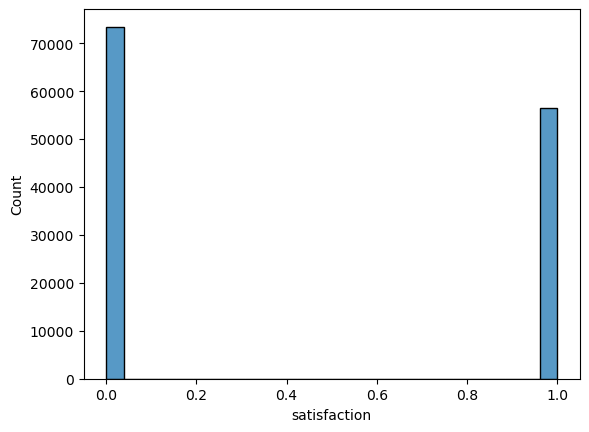

In [84]:
# Visualization distribution/class balance
sns.histplot(pass_airline['satisfaction'])
plt.show

**This shows that a majority of respondents (56.67%) are either neutral or dissatisfied, while only 43.33% are satisfied.**
**What this imply is that Customer sentiment is more negative or indifferent than positive. This may indicate issues with service quality, product experience, or unmet expectations.**

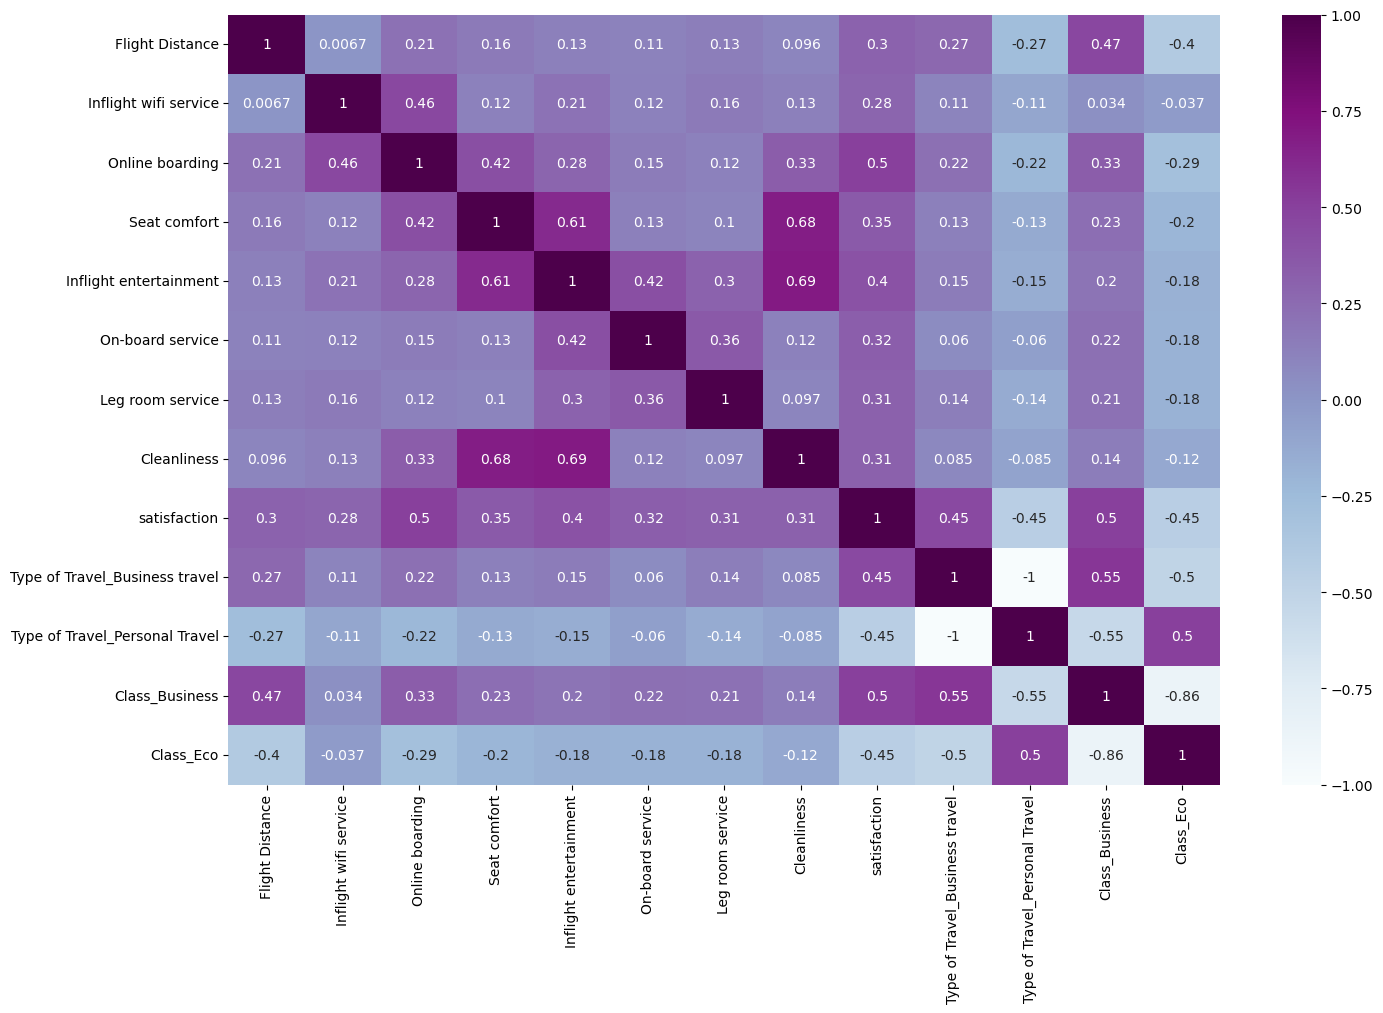

In [87]:
# Checking for correlation before training the model
corrmtx = pass_airline.corr()
highcorr = corrmtx[corrmtx['satisfaction'].abs().round(1) >= 0.3].index
highcorr = pass_airline[highcorr].corr()
plt.figure(figsize = (16, 10))

sns.heatmap(highcorr, annot = True, cmap="BuPu")
plt.show()

**Training the Model With LogisticRegression**

In [90]:
#Defining the feature and target
X = pass_airline.drop(['satisfaction', 'id'], axis = 1)
y = pass_airline['satisfaction']

# Splitting the table
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [92]:
# training with logistic model
logistic_model = LogisticRegression(random_state = 123) 
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

In [94]:
# Calculating the classification accuracy
def evaluate_class (y_test, logistic_pred):
    acc = accuracy_score (y_test, logistic_pred) * 100
    print(f"The Accuracy is {acc:.4f}%")

In [96]:
evaluate_class (y_test, logistic_pred)

The Accuracy is 81.2558%


In [98]:
# Generating a detailed classification report including precision, recall, F1-score, and support for each class
cl_report = classification_report(y_test, logistic_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     14815
           1       0.76      0.83      0.79     11161

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.82      0.81      0.81     25976



In [100]:
# Calculate and display the confusion matrix; showing the counts of true positives, false positives, true negatives, and false negatives
conf_mtx = confusion_matrix(y_test, logistic_pred)
print(conf_mtx)

[[11884  2931]
 [ 1938  9223]]


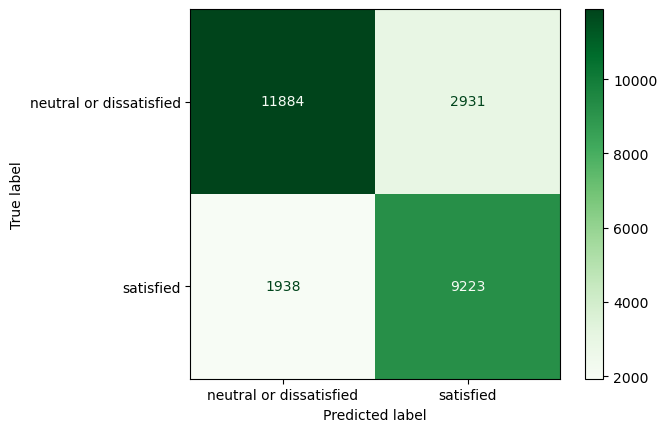

In [102]:
# Visualizing the confusion matrix

labels = ['neutral or dissatisfied', 'satisfied']
conf_mtx_dis = ConfusionMatrixDisplay(conf_mtx, display_labels = labels)
conf_mtx_dis.plot(cmap ='Greens')
plt.show()

In [104]:
# Confusion matrix components for the classification model:
# tp = True Positives: correctly predicted positive cases
# fn = False Negatives: positive cases incorrectly predicted as negative
# fp = False Positives: negative cases incorrectly predicted as positive
# tn = True Negatives: correctly predicted negative cases
tp = 11884 
fn = 9223
fp = 1938 
tn = 2931

# Calculate precision: the proportion of positive predictions that are actually correct
prec = tp / (tp + fp)

# Calculate recall: the proportion of actual positives correctly identified by the model
recall = tp / (tp + fn)

# Print results rounded to 4 significant figures
print(f"Precision: {prec:.4f}")  # 4 decimal figures
print(f"Recall: {recall:.4f}")

Precision: 0.8598
Recall: 0.5630


**Training the Model With DecisionTree**

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
decision_model = DecisionTreeClassifier(random_state = 123)
decision_model.fit(X_train, y_train)
decision_pred = decision_model.predict(X_test)

In [111]:
acc = accuracy_score (y_test, decision_pred) * 100
print(f"The Accuracy is {acc:.4f}%")

The Accuracy is 94.6874%


In [113]:
report = classification_report(y_test, decision_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14815
           1       0.93      0.94      0.94     11161

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [115]:
tweek_params = {
    'max_depth': [2,3,4, None],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2]
}

In [117]:
decision_tweek = DecisionTreeClassifier(random_state=123)
grid = GridSearchCV(decision_tweek, tweek_params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_estimator_
best_params.fit(X_train, y_train)

best_preds = best_params.predict(X_test)
acc_2 = accuracy_score(y_test, best_preds) * 100
print(f"The Accuracy is {acc_2:.4f}%")

The Accuracy is 95.0223%


In [119]:
report = classification_report(y_test, best_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14815
           1       0.95      0.94      0.94     11161

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [121]:
con_mtx_2 = confusion_matrix(y_test, best_preds)
print(con_mtx_2)

[[14220   595]
 [  698 10463]]


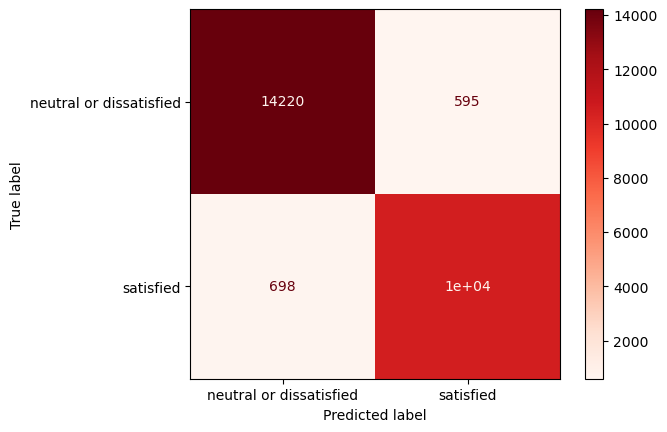

In [123]:
labels = ['neutral or dissatisfied', 'satisfied']
con_mtx_dis_2 = ConfusionMatrixDisplay(con_mtx_2, display_labels = labels)
con_mtx_dis_2.plot(cmap ='Reds')
plt.show()

**Training the Model With RandomForestClassifier**

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
# Using random forest regressor
rfm_model = RandomForestClassifier(random_state = 123)
rfm_model.fit(X_train, y_train)
rfm_pred = rfm_model.predict(X_test)

In [130]:
acc_3 = accuracy_score (y_test, rfm_pred) * 100
print(f"The Accuracy is {acc_3:.4f}%")

The Accuracy is 96.1541%


In [132]:
rfm_params_2 = {
    'n_estimators': [10,50,100],
    'max_depth': [2,3,4, None],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2]
}

In [134]:
rfm_refined = RandomForestClassifier(random_state=42)
grid_2 = GridSearchCV(rfm_refined, rfm_params_2, cv=10)
grid_2.fit(X_train, y_train)

# Get the best model from GridSearchCV (this one is already trained)
rfm_refined_params = grid_2.best_estimator_

# Use the trained best model to predict
rfm_preds_2 = rfm_refined_params.predict(X_test)

# Calculate accuracy
acc_3 = accuracy_score(y_test, rfm_preds_2) * 100
print(f"The Accuracy is {acc_3:.4f}%")


The Accuracy is 96.2273%


In [136]:
rfm_report = classification_report(y_test, rfm_preds_2)
print(rfm_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14815
           1       0.97      0.94      0.96     11161

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [138]:
rfm_con_mtx = confusion_matrix(y_test, rfm_preds_2)
print(rfm_con_mtx)

[[14490   325]
 [  655 10506]]


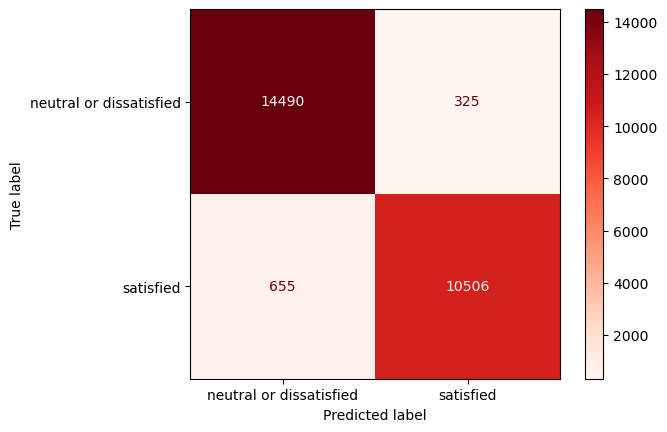

In [140]:
labels = ['neutral or dissatisfied', 'satisfied']
rfm_con_mtx_dis = ConfusionMatrixDisplay(rfm_con_mtx, display_labels = labels)
rfm_con_mtx_dis.plot(cmap ='Reds')
plt.show()